#### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pylab as plt

In [2]:
from scipy.stats import truncexpon

In [3]:
rv = truncexpon(b = (0.9-0.01) / 0.5, loc = 0.01, scale = 0.5)
mags = rv.rvs(100000000)

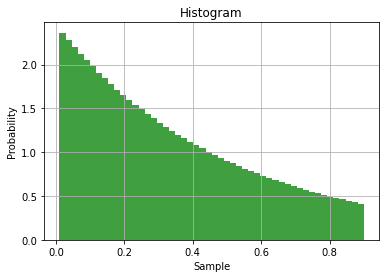

In [4]:
n, bins, patches = plt.hist(mags, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Sample')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [12]:
np.sum(np.diff(bins) * n)

1.0

In [11]:
np.mean(mags)

0.3294742030692167

#### Define paths

In [ ]:
plots_path = os.path.join('/home', 'renat_sergazinov', 
                          'python-git-workspace', 'PhotoForceReconML', 'model_testing', 'plots')

#### Preparing data

In [3]:
df_error_inner = pd.DataFrame()
df_error_inner["Number of forces"] = range(2, 7)
df_error_inner["InceptionResNetV2"] = [0.0262, 0.1003, 0.1748 , 0.2309, 0.1839]
df_error_inner["Xception"] = [0.0704, 0.1561, 0.2187, 0.2182, 0.2145]
df_error_inner["VGG19"] = [0.0315, 0.0529, 0.0533,  0.0468, 0.0527]
df_error_inner = pd.melt(df_error_inner, id_vars=["Number of forces"], value_name="Mean absolute error", var_name="Model")

In [21]:
df_error_tang = pd.DataFrame()
df_error_tang["Number of forces"] = range(2, 7)
df_error_tang["InceptionResNetV2"] = [0.0167, 0.0930, 0.1273, 0.2188, 0.2250]
df_error_tang["Xception"] = [0.0307, 0.1040, 0.1632, 0.1705, 0.1777]
df_error_tang["VGG19"] = [0.0220, 0.0391, 0.2325, 0.2190, 0.2227]
df_error_tang = pd.melt(df_error_tang, id_vars=["Number of forces"], value_name="Mean absolute error", var_name="Model")

#### Plot data

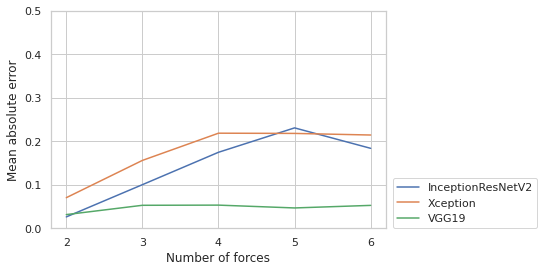

In [20]:
sns.set_theme(style="whitegrid")
s = sns.lineplot(data=df_error_inner, x="Number of forces", y="Mean absolute error", hue="Model")
s.set(ylim = (0,0.5))
s.set(xticks = np.arange(2,7,1))
plt.legend(bbox_to_anchor=(1.02, 0.230), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(plots_path, 'angles_inner_error.pdf'),
            dpi=300, bbox_inches='tight')

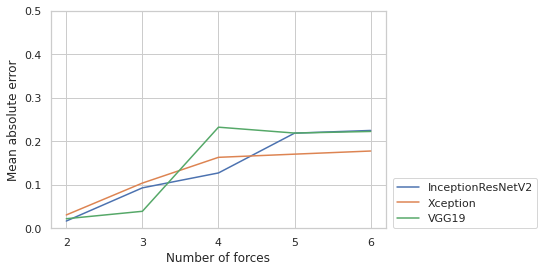

In [22]:
sns.set_theme(style="whitegrid")
s = sns.lineplot(data=df_error_tang, x="Number of forces", y="Mean absolute error", hue="Model")
s.set(ylim = (0,0.5))
s.set(xticks = np.arange(2,7,1))
plt.legend(bbox_to_anchor=(1.02, 0.230), loc='upper left', borderaxespad=0)
plt.savefig(os.path.join(plots_path, 'angles_tang_error.pdf'),
            dpi=300, bbox_inches='tight')